In [1]:
import numpy as np 
import pandas as pd 

## Info Data

In [2]:
# Load Data
df = pd.read_csv('Social_Network_Ads.csv')
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

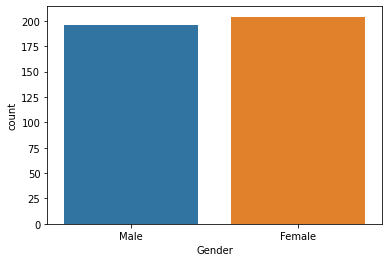

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Gender"])

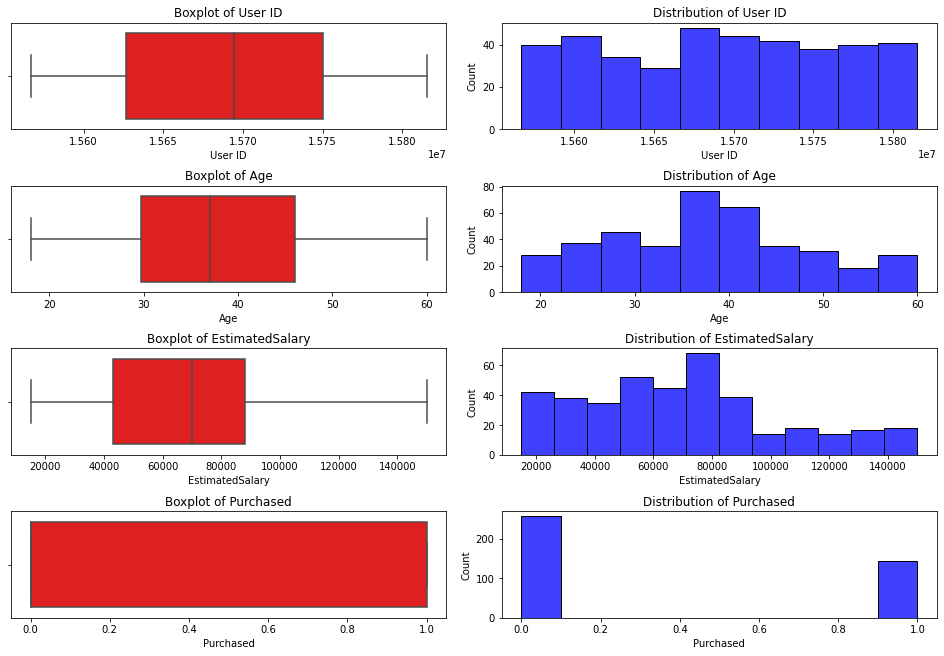

In [8]:
df_gozlem = df.select_dtypes(include=["float64","int64"])

f, axes = plt.subplots(len(df_gozlem.columns), 2, constrained_layout = True, figsize=([13,9]))

for i in range(len(df_gozlem.columns)):
    
    sns.boxplot(x=df_gozlem[df_gozlem.columns[i]], ax=axes[i,0], color="r")
    axes[i,0].set_title('Boxplot of '+df_gozlem.columns[i])
    sns.histplot(x=df_gozlem[df_gozlem.columns[i]], ax=axes[i,1], color="b")
    axes[i,1].set_title('Distribution of '+df_gozlem.columns[i])

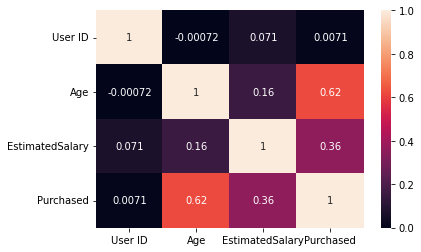

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Preprocessing

In [10]:
df.drop(["User ID"], axis=1, inplace=True) # melepas ID pengguna karena tidak berfungsi

In [11]:
df['Gender'] = np.where(df['Gender'] == "Female", 0, 1) #Ubah string ke int

In [12]:
y = df["Purchased"]
X = df.drop('Purchased',axis = 1)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
data_scaled = pd.DataFrame(scaled_data)
data_scaled.head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


## Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.20,random_state=42)

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(X_train,y_train)

y_pred = log_model.predict(X_test)

## Model Evaluation

In [16]:
print(f'Test accuracy: {log_model.score(X_test,y_test)}')
print(f'Train accuracy: {log_model.score(X_train,y_train)}')

Test accuracy: 0.8875
Train accuracy: 0.815625


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


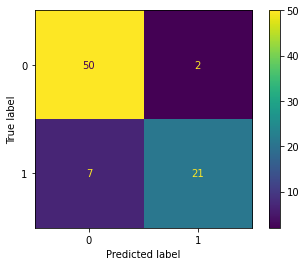

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_model, X_test, y_test)